# Forecasting U.S. Vehicle Sales (TOTALNSA)

**Project Objective:**  
Forecast future U.S. vehicle sales based on historical data using ARIMA modeling.

**Methodology:**  
ARIMA (AutoRegressive Integrated Moving Average) for time-series forecasting and Plotly for interactive data visualization.

**Data Source:**  
U.S. vehicle sales dataset (TOTALNSA) from [https://fred.stlouisfed.org/series/totalnsa].



In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the data from TOTALNSA.csv
data = pd.read_csv('TOTALNSA.csv', parse_dates=['DATE'], index_col='DATE')

# Display the first few rows of the dataset
print(data.head())

            TOTALNSA
DATE                
1976-01-01     885.2
1976-02-01     994.7
1976-03-01    1243.6
1976-04-01    1191.2
1976-05-01    1203.2


In [8]:
# Load the data without parsing dates
data = pd.read_csv('TOTALNSA.csv')

# Display the first few rows and the column names
print(data.head())
print(data.columns)

       DATE  TOTALNSA
0  1/1/1976     885.2
1  2/1/1976     994.7
2  3/1/1976    1243.6
3  4/1/1976    1191.2
4  5/1/1976    1203.2
Index(['DATE', 'TOTALNSA'], dtype='object')


The dataset comprises monthly U.S. Total Vehicle Sales from January 1976 onward, measured in thousands of units. Initial rows confirm clean structure with `DATE` and `TOTALNSA` columns.


### EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
# Check the columns in the DataFrame to ensure 'DATE' exists
print(data.columns)

# Convert 'DATE' column to datetime if it exists
if 'DATE' in data.columns:
    data['DATE'] = pd.to_datetime(data['DATE'])

    # Set 'DATE' as the index
    data.set_index('DATE', inplace=True)

    # Display the first few rows of the updated dataframe
    print(data.head())
else:
    print("The 'DATE' column does not exist in the DataFrame.")

Index(['DATE', 'TOTALNSA'], dtype='object')
            TOTALNSA
DATE                
1976-01-01     885.2
1976-02-01     994.7
1976-03-01    1243.6
1976-04-01    1191.2
1976-05-01    1203.2


In [10]:
# Display summary statistics
print(data['TOTALNSA'].describe())

count     583.000000
mean     1263.104273
std       221.235274
min       670.466000
25%      1118.359000
50%      1270.600000
75%      1421.769500
max      1845.713000
Name: TOTALNSA, dtype: float64


**Summary Statistics**:  
- Average monthly sales: ~1,263 thousand units  
- Min: 670.5k, Max: 1,845.7k  
- Data spans a wide range, indicating variability suitable for time series analysis.


In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 TOTALNSA    0
dtype: int64


No missing values detected in the dataset, ensuring data integrity for analysis and modeling.


### DECOMPOSING TIME SERIES 

*Addictive*

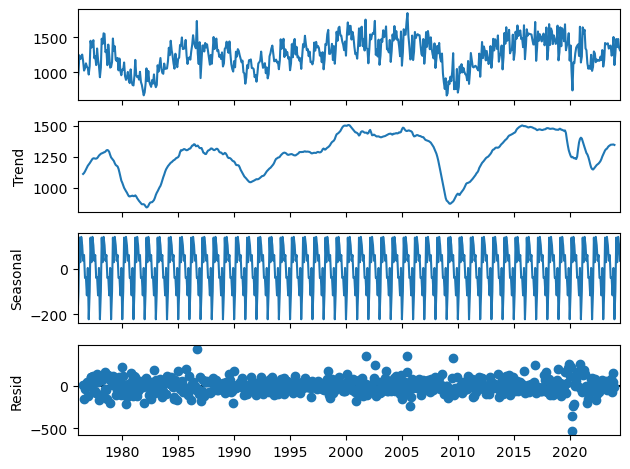

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data, model='additive')
decomposition.plot()
plt.show()

*Multiplicative*

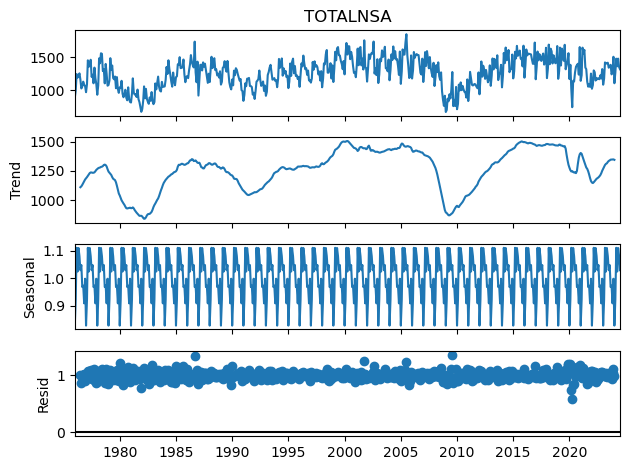

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['TOTALNSA'], model='multiplicative')
decomposition.plot()
plt.show()

### MODELING TIME SERIES

In [14]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(data['TOTALNSA'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Check if the series is stationary
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary. Differencing may be required.")

ADF Statistic: -2.9441488086974794
p-value: 0.04044970982409354
The time series is stationary.


In [15]:
# Apply differencing
data['TOTALNSA_diff'] = data['TOTALNSA'].diff().dropna()

# Check the ADF test again on the differenced data
result_diff = adfuller(data['TOTALNSA_diff'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

ADF Statistic (Differenced): -6.576976189460978
p-value (Differenced): 7.68189845003594e-09


In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(data['TOTALNSA'], order=(1, 1, 1))  # Adjust the order as needed
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

c:\Users\emman\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\emman\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\emman\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               TOTALNSA   No. Observations:                  583
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3740.970
Date:                Mon, 24 Mar 2025   AIC                           7487.941
Time:                        13:50:13   BIC                           7501.040
Sample:                    01-01-1976   HQIC                          7493.047
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3076      0.057      5.363      0.000       0.195       0.420
ma.L1         -0.8501      0.033    -25.855      0.000      -0.915      -0.786
sigma2      2.238e+04   1296.609     17.260      0.0

### FORECASTING

In [17]:
# Forecasting the next 10 periods
forecast = model_fit.forecast(steps=10)
print("Forecasted values:\n", forecast)

Forecasted values:
 2024-08-01    1334.793835
2024-09-01    1340.504944
2024-10-01    1342.261477
2024-11-01    1342.801723
2024-12-01    1342.967884
2025-01-01    1343.018989
2025-02-01    1343.034707
2025-03-01    1343.039541
2025-04-01    1343.041028
2025-05-01    1343.041485
Freq: MS, Name: predicted_mean, dtype: float64


### Visualizing the Forecast

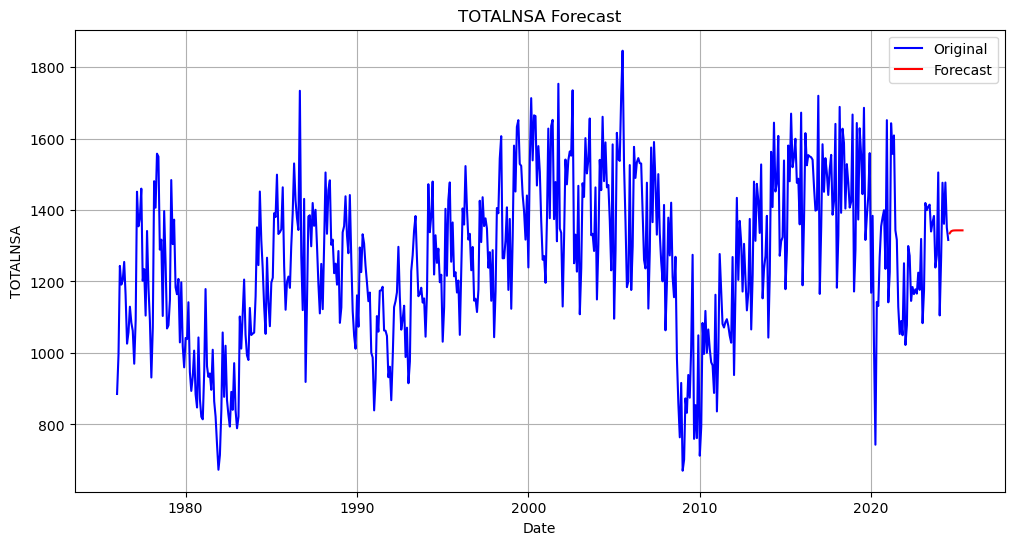

In [18]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['TOTALNSA'], label='Original', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('TOTALNSA Forecast')
plt.xlabel('Date')
plt.ylabel('TOTALNSA')
plt.legend()
plt.grid()
plt.show()

### ARIMA(1,1,1) model fitted to Data Using Plotly

In [19]:
import pandas as pd
import plotly.graph_objs as go
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess
data = pd.read_csv('TOTALNSA.csv', parse_dates=['DATE'])
data.set_index('DATE', inplace=True)

# Fit ARIMA
model = ARIMA(data['TOTALNSA'], order=(1,1,1))
result = model.fit()

# Forecast next 12 months
forecast = result.get_forecast(steps=12)
ci = forecast.conf_int()
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Plot with Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['TOTALNSA'], mode='lines', name='Observed'))
fig.add_trace(go.Scatter(x=forecast_series.index, y=forecast_series, mode='lines', name='Forecast'))
fig.add_trace(go.Scatter(
    x=forecast_series.index.tolist() + forecast_series.index[::-1].tolist(),
    y=ci['upper TOTALNSA'].tolist() + ci['lower TOTALNSA'][::-1].tolist(),
    fill='toself', fillcolor='rgba(0,100,80,0.2)', line=dict(color='rgba(255,255,255,0)'), name='Confidence Interval'
))

fig.update_layout(title='ARIMA Forecast with 95% Confidence Interval',
                  xaxis_title='Date', yaxis_title='TOTALNSA',
                  template='plotly_dark')
fig.show()


c:\Users\emman\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\emman\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\emman\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


The ARIMA model (1,1,1) forecasts vehicle sales for the next 12 months. Forecast aligns with recent trends, and confidence intervals provide uncertainty bounds for planning. Interactive Plotly visualization enhances exploration.


In [20]:
import plotly.io as pio

# Save Plotly figure as HTML
fig.write_html("vehicle_sales_forecast.html")

# Save Plotly figure as PNG (requires Kaleido package)
fig.write_image("vehicle_sales_forecast.png")
